In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
read_file = pd.read_csv (r'/content/drive/MyDrive/DM project/Online Examination (Responses) - 1.csv')
read_file.to_csv (r'/content/drive/MyDrive/DM project/Online Examination (Responses) - 1.csv', index=None)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y = read_file['Name']
y

0           Tonny Saha
1      Shahajada hasib
2       Md Arafuzzaman
3             Khalida 
4      Afrin Jahan Etu
            ...       
304         Asif Islam
305         Afrin Knta
306       Swapan Kumar
307      Nirmal biswas
308        Nasrin Popy
Name: Name, Length: 309, dtype: object

In [ ]:
y = read_file['Your Email id']
y

0         tonnyranisaha1@gmail.com
1         shahajadahasib@gmail.com
2            arafuzzaman@gmail.com
3      Khalidatasneem01@gmail.com 
4        afrinjahanetu66@gmail.com
                  ...             
304                asif1@gmail.com
305              kanta21@gmail.com
306             kumar123@gmail.com
307             nirmal01@gmail.com
308          NasrinPopy1@gmail.com
Name: Your Email id, Length: 309, dtype: object

In [ ]:
x = read_file.drop('Your Email id', axis=1)
x

,Name,Age,Gender,Education level,Are you accustomed to online exams?,How much do you understand online exam?,How satisfied are you with the online exam?,How much online exam is increasing your knowledge?,Your exam experience after Covid-19
0,Tonny Saha,21,Female,Under Graduate,Yes,50%-90%,60%-90%,Too much,Much more experience
1,Shahajada hasib,23,Male,Under Graduate,Yes,100%,10%-30%,Not so much,The online exam experience was not beneficial ...
2,Md Arafuzzaman,25,Male,Under Graduate,Yes,50%-90%,60%-90%,50%,40%
3,Khalida,21,Female,Under Graduate,Yes,100%,60%-90%,70%,As a Private university Student its Normal
4,Afrin Jahan Etu,21,Female,Under Graduate,Yes,50%-90%,10%-30%,Not so much,So bad
...,...,...,...,...,...,...,...,...,...
304,Asif Islam,23,Male,Under Graduate,Yes,50%-90%,60%-90%,Too much,Too much
305,Afrin Knta,22,Female,Under Graduate,Yes,10%-50%,10%-30%,Not so much,Bad
306,Swapan Kumar,21,Male,Under Graduate,Yes,10%-50%,30%-60%,Good Enough,Good
307,Nirmal biswas,21,Male,Under Graduate,Yes,50%-90%,60%-90%,Good Enough,Good Enough


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
l = LabelEncoder()
y_train = l.fit_transform(y_train)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.11
Tensorflow version: 2.6.0
Keras version: 2.6.0


In [ ]:
#Load the TensorBoard notebook extension

%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1


print('IMAGE_WIDTH: ', IMAGE_WIDTH);
print('IMAGE_HEIGHT: ', IMAGE_HEIGHT);
print('IMAGE_CHANNELS: ', IMAGE_CHANNELS);

IMAGE_WIDTH:  28
IMAGE_HEIGHT:  28
IMAGE_CHANNELS:  1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


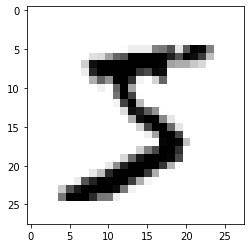

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

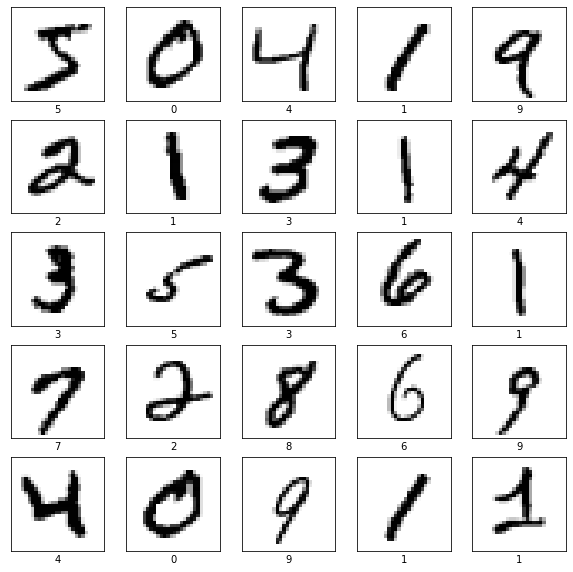

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

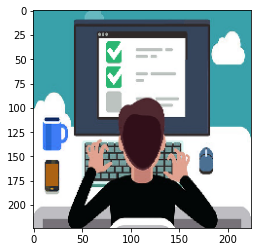

In [ ]:
test_image_path =('/content/drive/MyDrive/DM project/1566798061-exam-online.jpg')
img = tf.keras.preprocessing.image.load_img(test_image_path, target_size = (224,224))
plt.imshow(img)

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
# Model run
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

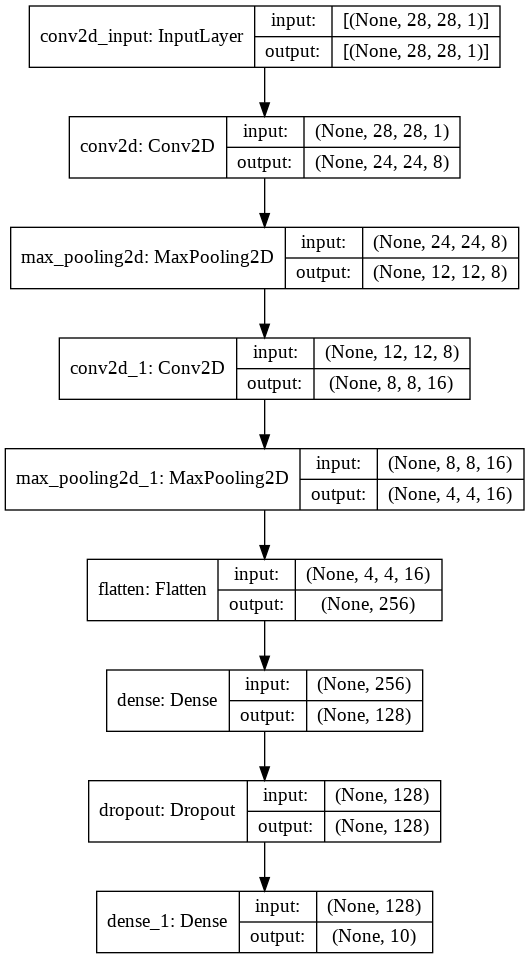

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1828 - accuracy: 0.9442 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0374 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0385 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0380 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0327 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0304 -

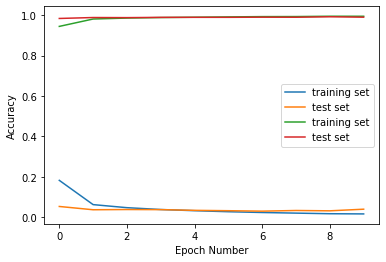

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

In [ ]:
model_name = 'digits_recognition_Project-2.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


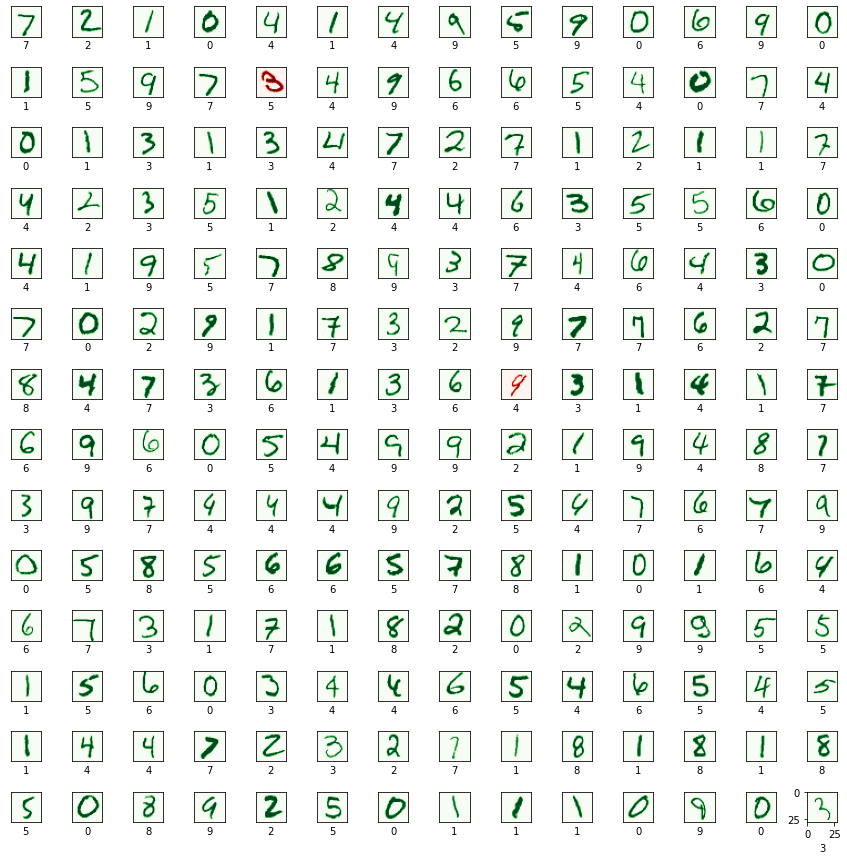

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()